In [62]:
import os
import sys
import random
from glob import glob
from copy import deepcopy
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)
from mejiro.instruments.hwo import HWO
from mejiro.synthetic_image import SyntheticImage
from mejiro.exposure import Exposure
from mejiro.utils import util

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

# set HWO directory
hwo_dir = os.path.join(repo_dir, 'hwo')

In [63]:
pickled_lenses = sorted(glob('/data/bwedig/mejiro/hwo/dinos/*'))

strong_lenses = []
for p in pickled_lenses:
    system_name = os.path.basename(p).split('.')[0]
    strong_lens = util.unpickle(p)
    strong_lens.uid = system_name
    strong_lenses.append(strong_lens)

print(f'Loaded {len(strong_lenses)} strong lenses')

Loaded 68 strong lenses


In [64]:
hwo = HWO(eac='EAC1')

kwargs_numerics = {
    'supersampling_factor': 1,
    'compute_mode': 'regular'
}
engine_params = {
    'rng_seed': 42,
    'sky_background': True,
    'detector_effects': True,
    'poisson_noise': True,
    'dark_noise': True,
    'read_noise': True,
}

synthetic_images = []
exposures = []

for lens in tqdm(strong_lenses):
    try:
        synthetic_image = SyntheticImage(strong_lens=lens,
                                            instrument=hwo,
                                            band='J',
                                            fov_arcsec=6,
                                            kwargs_numerics=kwargs_numerics,
                                            verbose=False)
        synthetic_images.append(synthetic_image)
        

        exposure = Exposure(synthetic_image,
                                exposure_time=1e10,
                                engine_params=engine_params,
                                verbose=False)
        exposures.append(exposure)
    except Exception as e:
        print(f'Failed to create synthetic image or exposure for lens {lens}: {e}')
        continue

  1%|▏         | 1/68 [00:00<00:11,  5.58it/s]

100%|██████████| 68/68 [00:12<00:00,  5.43it/s]


In [65]:
print(synthetic_image.pixel_scale)

0.017188733853924696


In [66]:
images = [e.exposure for e in exposures]
titles = [l.uid for l in strong_lenses]

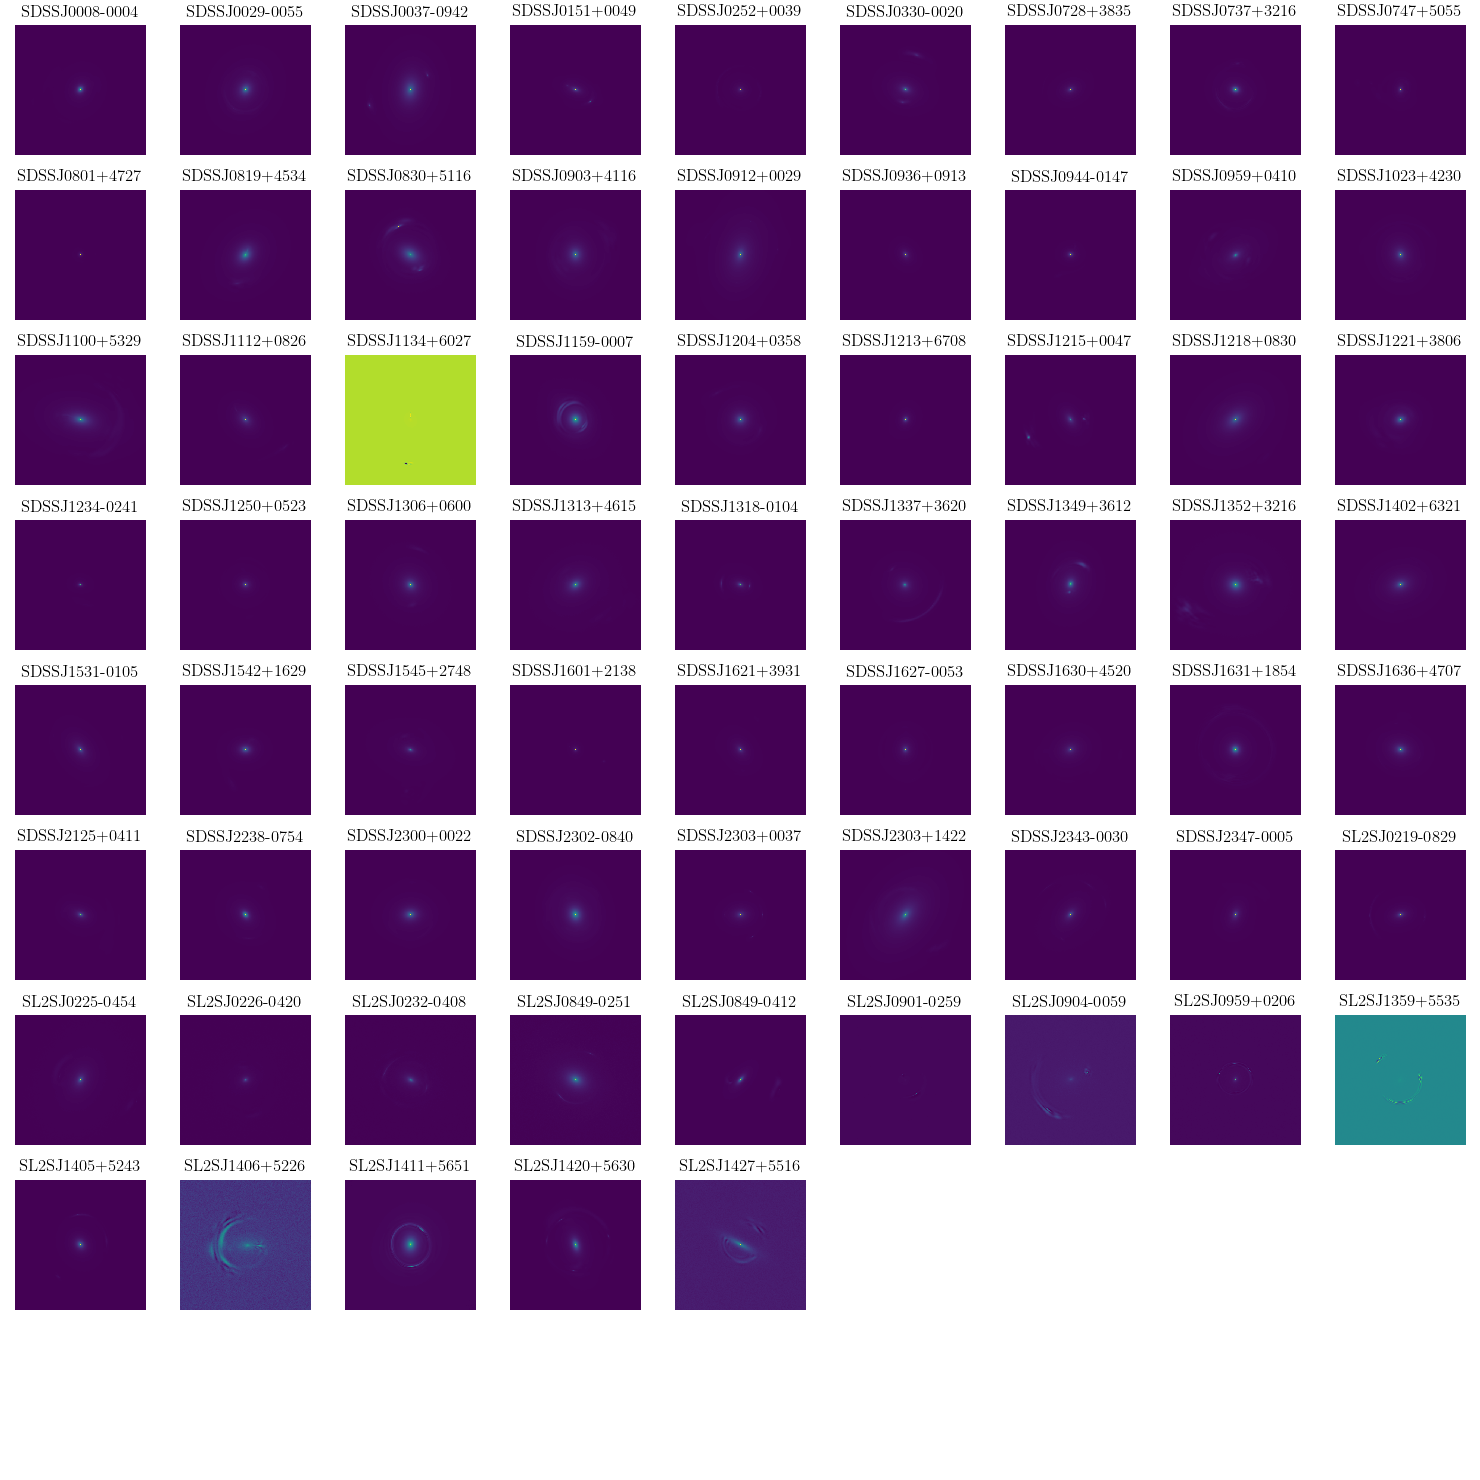

In [67]:
# Determine the grid size
grid_size = int(np.ceil(np.sqrt(len(images))))

# Create a figure with subplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each image in the grid
for i, (image, title) in enumerate(zip(images, titles)):
    ax = axes[i]
    ax.imshow(np.log10(image))
    ax.set_title(title)
    ax.axis('off')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [91]:
pickled_lenses = sorted(glob('/data/bwedig/mejiro/hwo/dinos_good/*'))

strong_lenses = []
for p in pickled_lenses:
    system_name = os.path.basename(p).split('.')[0]
    strong_lens = util.unpickle(p)
    strong_lens.uid = system_name
    strong_lenses.append(strong_lens)

print(f'Loaded {len(strong_lenses)} strong lenses')

hwo = HWO(eac='EAC1')

kwargs_numerics = {
    'supersampling_factor': 3,
    'compute_mode': 'regular'
}
engine_params = {
    'rng_seed': 42,
    'sky_background': True,
    'detector_effects': True,
    'poisson_noise': True,
    'dark_noise': True,
    'read_noise': True,
}

synthetic_images = []
exposures = []

for lens in tqdm(strong_lenses):
    try:
        synthetic_image = SyntheticImage(strong_lens=lens,
                                            instrument=hwo,
                                            band='J',
                                            fov_arcsec=5,
                                            kwargs_numerics=kwargs_numerics,
                                            verbose=False)
        synthetic_images.append(synthetic_image)
        

        exposure = Exposure(synthetic_image,
                                exposure_time=1e10,
                                engine_params=engine_params,
                                verbose=False)
        exposures.append(exposure)
    except Exception as e:
        print(f'Failed to create synthetic image or exposure for lens {lens}: {e}')
        continue

images = [e.exposure for e in exposures]
titles = [l.uid for l in strong_lenses]

Loaded 49 strong lenses


  0%|          | 0/49 [00:00<?, ?it/s]

100%|██████████| 49/49 [01:03<00:00,  1.31s/it]


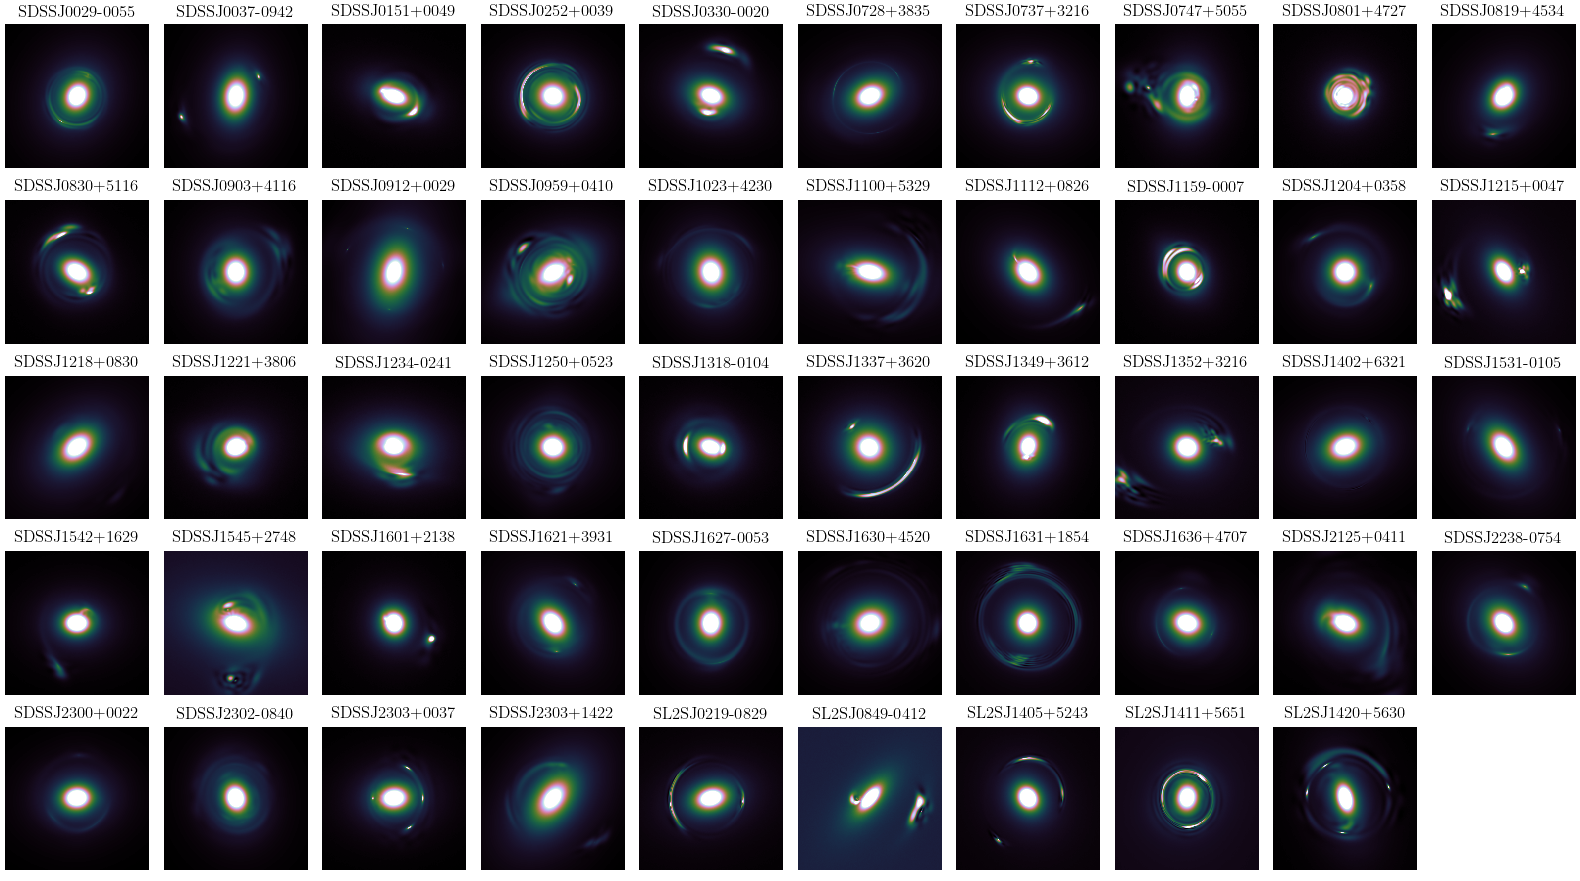

In [97]:
from matplotlib.colors import Normalize

# Create a figure with subplots
fig, axes = plt.subplots(5, 10, figsize=(16, 9))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each image in the grid
for i, (image, title) in enumerate(zip(images, titles)):
    ax = axes[i]

    norm = Normalize(vmin=np.min(image), vmax=np.percentile(image, 99))

    ax.imshow(image, cmap='cubehelix', norm=norm)
    ax.set_title(title)
    ax.axis('off')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('../figures/dinos_good.png')
plt.show()